Name: Dandi Gutema
Student ID=2101714

In [54]:
# Loading all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor

In [55]:
# Importing data
patient = pd.read_csv('patients.csv')
patient.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1


In [56]:
# No missing values
patient.isna().sum()

age               0
gender            0
pain              0
blood_pressure    0
cholesterol       0
blood_sugar       0
heart_rate        0
exercise          0
outcome           0
dtype: int64

In [57]:
patient.describe()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,1.000000


In [58]:
patient.mean()

age                54.366337
gender              0.683168
pain                0.966997
blood_pressure    131.623762
cholesterol       246.264026
blood_sugar         0.148515
heart_rate        149.646865
exercise            0.326733
outcome             0.544554
dtype: float64

In [59]:
patient.corr()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.398522,0.096801,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.044020,0.141664,-0.280937
pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.295762,-0.394280,0.433798
blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.046698,0.067616,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.009940,0.067023,-0.085239
blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.008567,0.025665,-0.028046
heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,1.000000,-0.378812,0.421741
exercise,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.378812,1.000000,-0.436757
outcome,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.421741,-0.436757,1.000000


In [60]:
patient.outcome.value_counts()

1    165
0    138
Name: outcome, dtype: int64

In [61]:
patient.groupby('outcome').mean()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise
outcome,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,139.101449,0.550725
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,158.466667,0.139394


<AxesSubplot:xlabel='pain', ylabel='heart_rate'>

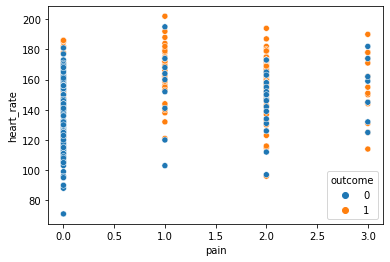

In [62]:
sns.scatterplot(x= 'pain', y='heart_rate', hue='outcome', data=patient)

<AxesSubplot:xlabel='age', ylabel='blood_pressure'>

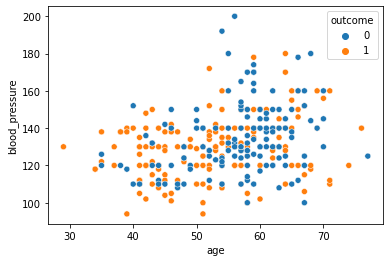

In [63]:
sns.scatterplot(x= 'age', y='blood_pressure', hue='outcome', data=patient)

<AxesSubplot:xlabel='outcome', ylabel='exercise'>

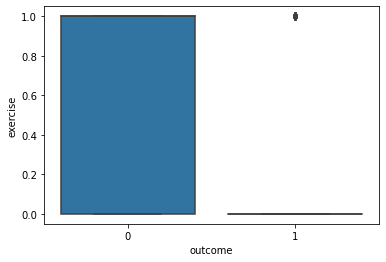

In [64]:
sns.boxplot(x='outcome', y='exercise', data=patient)

<AxesSubplot:xlabel='outcome', ylabel='exercise'>

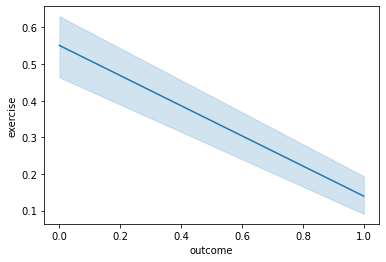

In [65]:
sns.lineplot(x='outcome', y='exercise', data=patient)

<AxesSubplot:xlabel='outcome', ylabel='heart_rate'>

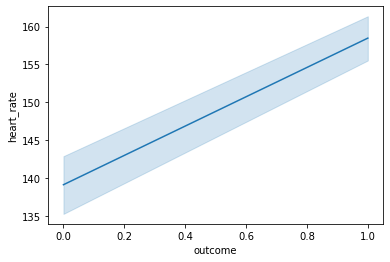

In [66]:
sns.lineplot(x='outcome', y='heart_rate', data=patient)

<AxesSubplot:xlabel='outcome', ylabel='gender'>

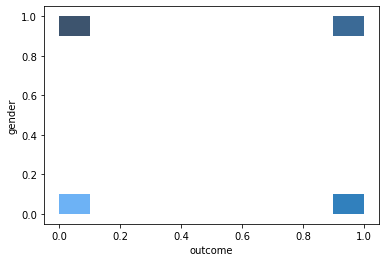

In [67]:
sns.histplot(x='outcome', y='gender', data=patient)

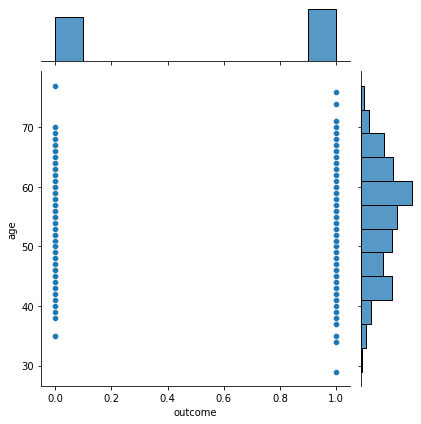

In [68]:
sns.jointplot(x='outcome',y='age',data=patient)

In [69]:
# Creating training and test set
X = patient.drop(['outcome'], axis=1)
y = patient.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [71]:
# logistic regresssion 
logit_patient = LogisticRegression(random_state=42)
logit_patient.fit(X_train, y_train)
pred_patient = logit_patient.predict(X_test)

print (confusion_matrix(y_test,pred_patient))
print (classification_report(y_test, pred_patient))


# the accuracy for logistic regression is 0.82

[[28  7]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.83      0.83      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



C:\Users\dandi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
# Decision tree model

tree_patient = DecisionTreeClassifier(random_state = 42)

base_patient = tree_patient.fit(X_train, y_train)

base_patient_pred = base_patient.predict(X_test)

print(confusion_matrix(y_test ,base_patient_pred)) 
print(classification_report(y_test, base_patient_pred))
# the accuracy for Decision tree is 0.78

[[26  9]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        35
           1       0.79      0.80      0.80        41

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



In [73]:
#Properties of the tree

# Number of levels:
print('Depth of the tree: ',tree_patient.tree_.max_depth)

# Number of nodes (total)
print('Number of nodes in the tree: ',tree_patient.tree_.node_count)

Depth of the tree:  11
Number of nodes in the tree:  97


In [74]:
# Optimizing decision tree

opt_tree_patient = DecisionTreeClassifier(random_state = 42)

criterion = ['gini', 'entropy']
max_depth = [2, 4, 6, 8, 10]
weights = ['balanced', {0:0.5, 1:0.5}, {0:0.3, 1:0.7}]

grid = dict(criterion = criterion, max_depth = max_depth, class_weight = weights)

grid_search = GridSearchCV(estimator= opt_tree_patient, param_grid=grid, scoring='accuracy')

grid_result = grid_search.fit(X, y)

# The achieved accuracy is  0.7590
print('Best parameters', grid_result.best_params_)
print('Best score:', grid_result.best_score_)


Best parameters {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2}
Best score: 0.7590710382513661


In [75]:
#the optimized decision tree
tree_patient =DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=2, random_state=42)

patient_fit = tree_patient.fit(X_train, y_train)

patient_pred = patient_fit.predict(X_test)

print(confusion_matrix(y_test ,patient_pred)) 
print(classification_report(y_test, patient_pred))
# the accuracy for Decision tree is improved from 0.78 to 0.80


[[30  5]
 [10 31]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.86      0.76      0.81        41

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76



In [76]:
# Optimizing bagging

bag_patient = BaggingClassifier(base_estimator = opt_tree_patient, n_estimators = 300, random_state = 42)

bag_patient.fit(X_train, y_train)

bag_predict = bag_patient.predict(X_test)

print(confusion_matrix(y_test, bag_predict))
print(classification_report(y_test, bag_predict)) 
# The achieved accuracy is  0.83

[[29  6]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [77]:
# Optimizing random forest

grid = dict(criterion = criterion, max_depth = max_depth, class_weight = weights)

forest_patient = RandomForestClassifier(n_estimators = 300, random_state = 42)

grid_search = GridSearchCV(estimator = forest_patient, param_grid=grid, scoring='accuracy')

grid_result = grid_search.fit(X, y)

#  the accuracy of optimized random forest is 0.772

print("Best result is", grid_result.best_score_, 'using', grid_result.best_params_)

Best result is 0.7722404371584699 using {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}


In [ ]:
## Across the optimized models the best score was achieved using bagging =   0.83

In [78]:
# Most important features based on best model
best_model = grid_result.best_estimator_

# The four most important variables are pain, heart_rate, exercise, and age
pd.Series(data = best_model.feature_importances_, index= X_train.columns).sort_values()

blood_sugar       0.011304
cholesterol       0.067506
blood_pressure    0.076740
gender            0.082282
age               0.123832
exercise          0.143724
heart_rate        0.198688
pain              0.295924
dtype: float64

In [79]:
# Create new training and test set
X = patient[['pain', 'heart_rate', 'exercise', 'age']]
y = patient.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Decision tree model with identified optimal parameters of decsion tree

select_patient = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced', 
                                   criterion = 'gini', max_depth = 2)
select_patient.fit(X_train, y_train)
select_predict = select_patient.predict(X_test)

# The best accuracy acheived is 0.80
print(confusion_matrix(y_test, select_predict))
print(classification_report(y_test, select_predict)) 

[[30  5]
 [10 31]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.86      0.76      0.81        41

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76



In [ ]:
##using only four variables the accuracy reaches to 0.80(80%). 
##The best accuracy was achieved using bagging classifier 0.83(83%)